### requests 라이브러리
- 서버에게 데이터를 요청해서 응답받기 위한 라이브러리
- 브라우저의 역할을 대신한다.

In [31]:
# 라이브러리 로딩
import requests as req

In [32]:
# naver 페이지 정보 받아오기

res = req.get('https://www.naver.com/')
res

# Response [200] : 성공적으로 응답을 받았다. 통신 성공 !
# Response [400] : 클라이언트(요청)의 문제
# Response [500] : 서버(응답)의 문제

<Response [200]>

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
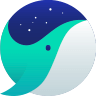
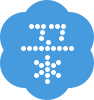

In [33]:
# 요청한 url 주소의 페이지 보기
res.text

# 결과가 문자열 형태의 데이터 -> 컴퓨터가 해석하기 어려움..

### BeautifulSoup 라이브러리
- 컴퓨터가 이해할 수 있는 언어로 변환해주는 라이브러리
- bs 객체화

In [34]:
# 념겨받은 데이터가 text(문자열) 형태임
# 컴퓨터가 접근할 수 있는 html 형태로 변환 해주어야 함 !

# 뷰티풀숩 라이브러리 로딩
from bs4 import BeautifulSoup as bs

In [35]:
# BeautifulSoup 객체화 --> bs객체화
# bs(페이지정보, '파싱방법')
soup = bs(res.text, 'lxml')

In [36]:
# naver 페이지에서 '메일' 글자 수집
# select() : 원하는 요소 정보를 가져오는 기능
# 주의할 점 : 반환하는 값이 무조건 리스트 형태이다.
# 인덱싱이 필요하다 !
soup.select('a.nav')[0]

<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>

In [37]:
# 요소에서 우리가 필요한 순수 컨텐츠만 추출 --> .text
soup.select('a.nav')[0].text

'메일'

In [38]:
# 메일 카페 블로그 글자 데이터 수집
tag = soup.select('a.nav')

In [39]:
# 메일만 추출
tag[0].text

'메일'

In [40]:
# 데이터의 길이를 아렬주는 함수
len(tag)

16

In [41]:
# 반복문을 활용해서 모든 데이터를 추출
# range() : 범위를 생성해주는 함수
# range(시작할값, 끝값(포함x), 증감값)
for i in range(len(tag)) :
    print(tag[i].text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV
사전
뉴스
증권
부동산
지도
VIBE
도서
웹툰


### 네이버 날씨에서 온도 데이터 수집
- 네이버 검색창에 '날씨' 검색 후 나오는 온도 데이터

In [42]:
# 1. 네이버 날씨 url을 통해 날씨 페이지 정보 가져오기(응답)
# 2. bs 객체화 진행 -> bs(페이지정보, 'lxml')
# 3. 온도 데이터의 태그 위치를 선택
# 4. 우리가 필요한 순수 데이터인 컨텐츠만 추출

In [43]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%A0%EC%94%A8'
res = req.get(url)

In [44]:
soup = bs(res.text, 'lxml')

In [45]:
temp = soup.select('div.temperature_text>strong')

In [46]:
temp[0].text

'현재 온도8.7°'

In [47]:
# select_one() : 모든 태그 중 갖아 상단에 있는 요소만 가져온다. (인덱스0번)
# select() : 모든 태그를 가져온다. 복수개, [리스트] 형태로 반환
# --> 그래서 .text를 해줄때에는 반드시 인덱싱을 해주어야 함.
soup.select_one('div.temperature_text>strong')

<strong><span class="blind">현재 온도</span>8.7<span class="celsius">°</span></strong>

### 네이버 뉴스 타이틀 수집
- 키워드 : 벚꽃

In [48]:
# 1. 페이지의 정보가 변경 될 때마다 다시 요청해주어야 한다.
# -> 페이지의 정보 가져오기
# 2. bs 객체화 진행
# 3. 뉴스 제목 태그 위치 선택
# 4. 컨텐츠 출력 (상위 5개 뉴스 제목만 출력)

In [49]:
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=news&query=%EB%B2%9A%EA%BD%83&oquery=%EC%BD%94%EB%A1%9C%EB%82%98&tqi=itY7RsprvTossKJOg2KssssssuN-496011'
res = req.get(url)

In [50]:
soup = bs(res.text, 'lxml')

In [51]:
title = soup.select('a.news_tit')

In [52]:
for i in range(5) :
    print(title[i].text)

"벚꽃 개화는 언제?" 카톡 채널창에 물으니 AI가 답했다
'가평 숨은 벚꽃 명소' 옛 중앙내수면연구소 임시개방
킹덤, 오늘 미니6집 ‘벚꽃 왕국’ 핀다
'벚꽃 명소' 경주엑스포, 벚꽃 버스킹 열린다
벚꽃과 바다를 한 눈에... 거제 최초 '벚꽃축제' 열린다


키워드 : 개발자

In [53]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EA%B0%9C%EB%B0%9C%EC%9E%90'
res = req.get(url)
soup = bs(res.text, 'lxml')
title = soup.select('a.news_tit')

for i in range(5) :
    print(title[i].text)

[팩플] 게임 개발자 축제 GDC 간 K-게임, 키워드는 블록체인
삼성 '노태북' 개발자…"갤북3 새로운 표준…판매량 2배 이상 증가"
게임 개발자 축제에 뜬 '디지털 김택진'…韓 게임사 존재감 뽐냈다
"게임 개발자가 가상세계 근간"…'GDC 2023' 화두는 '메타버스'
챗GPT로 코드 짜는 개발자, 일자리 앗아갈 AI
